In [24]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split 
import numpy as np

In [2]:
cancer = load_breast_cancer() 
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, random_state=1)
print(X_train.shape) 
print(X_test.shape)

(426, 30)
(143, 30)


## Using Min Max Scaler

In [3]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
scaler.fit(X_train)

MinMaxScaler()

In [4]:
# transform data 
X_train_scaled = scaler.transform(X_train) 
# print dataset properties before and after scaling
print("transformed shape: {}".format(X_train_scaled.shape)) 
print("per-feature minimum before scaling:\n {}".format(X_train.min(axis=0))) 
print("per-feature maximum before scaling:\n {}".format(X_train.max(axis=0))) 
print("per-feature minimum after scaling:\n {}".format( X_train_scaled.min(axis=0)))
print("per-feature maximum after scaling:\n {}".format( X_train_scaled.max(axis=0)))

transformed shape: (426, 30)
per-feature minimum before scaling:
 [6.981e+00 9.710e+00 4.379e+01 1.435e+02 5.263e-02 1.938e-02 0.000e+00
 0.000e+00 1.060e-01 5.024e-02 1.153e-01 3.602e-01 7.570e-01 6.802e+00
 1.713e-03 2.252e-03 0.000e+00 0.000e+00 9.539e-03 8.948e-04 7.930e+00
 1.202e+01 5.041e+01 1.852e+02 7.117e-02 2.729e-02 0.000e+00 0.000e+00
 1.566e-01 5.521e-02]
per-feature maximum before scaling:
 [2.811e+01 3.928e+01 1.885e+02 2.501e+03 1.634e-01 2.867e-01 4.268e-01
 2.012e-01 3.040e-01 9.575e-02 2.873e+00 4.885e+00 2.198e+01 5.422e+02
 3.113e-02 1.354e-01 3.960e-01 5.279e-02 6.146e-02 2.984e-02 3.604e+01
 4.954e+01 2.512e+02 4.254e+03 2.226e-01 9.379e-01 1.170e+00 2.910e-01
 5.774e-01 1.486e-01]
per-feature minimum after scaling:
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0.]
per-feature maximum after scaling:
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1.]


In [5]:
# transform test data 
X_test_scaled = scaler.transform(X_test)
# print test data properties after scaling
print("per-feature minimum after scaling:\n{}".format(X_test_scaled.min(axis=0))) 
print("per-feature maximum after scaling:\n{}".format(X_test_scaled.max(axis=0)))

per-feature minimum after scaling:
[ 0.0336031   0.0226581   0.03144219  0.01141039  0.14128374  0.04406704
  0.          0.          0.1540404  -0.00615249 -0.00137796  0.00594501
  0.00430665  0.00079567  0.03919502  0.0112206   0.          0.
 -0.03191387  0.00664013  0.02660975  0.05810235  0.02031974  0.00943767
  0.1094235   0.02637792  0.          0.         -0.00023764 -0.00182032]
per-feature maximum after scaling:
[0.9578778  0.81501522 0.95577362 0.89353128 0.81132075 1.21958701
 0.87956888 0.9333996  0.93232323 1.0371347  0.42669616 0.49765736
 0.44117231 0.28371044 0.48703131 0.73863671 0.76717172 0.62928585
 1.33685792 0.39057253 0.89612238 0.79317697 0.84859804 0.74488793
 0.9154725  1.13188961 1.07008547 0.92371134 1.20532319 1.63068851]


In [13]:
from sklearn.datasets import make_blobs 
import mglearn
import matplotlib.pyplot as plt

# make synthetic data
X, _ = make_blobs(n_samples=50, centers=5, random_state=4, cluster_std=2) 
# split it into training and test sets 
X_train, X_test = train_test_split(X, random_state=5, test_size=.1)

print(X_train.shape)
print(X_test.shape)

(45, 2)
(5, 2)


Text(0.5, 1.0, 'Improperly Scaled Data')

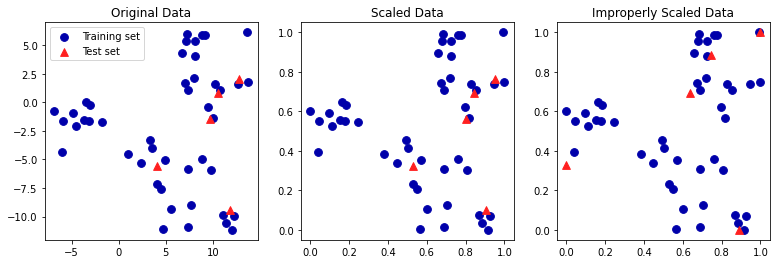

In [18]:
# Plot the training and test sets 
fig, axes = plt.subplots(1, 3, figsize=(13, 4)) 
axes[0].scatter(X_train[:, 0], X_train[:, 1], color = mglearn.cm2(0), label="Training set", s=60) 
axes[0].scatter(X_test[:, 0], X_test[:, 1], marker='^', color = mglearn.cm2(1), label="Test set", s=60)
axes[0].legend(loc='upper left') 
axes[0].set_title("Original Data")

# scale the data using MinMaxScaler
scaler = MinMaxScaler() 
scaler.fit(X_train) 
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

# visualize the properly scaled data 
axes[1].scatter(X_train_scaled[:, 0], X_train_scaled[:, 1], color = mglearn.cm2(0), label="Training set", s=60) 
axes[1].scatter(X_test_scaled[:, 0], X_test_scaled[:, 1], marker='^', color = mglearn.cm2(1), label="Test set", s=60)
axes[1].set_title("Scaled Data")

#### Wrong ####

# rescale the test set separately # so test set min is 0 and test set max is 1 # DO NOT DO THIS! For illustration purposes only.
test_scaler = MinMaxScaler() 
test_scaler.fit(X_test) 
X_test_scaled_badly = test_scaler.transform(X_test) 
# visualize wrongly scaled data 
axes[2].scatter(X_train_scaled[:, 0], X_train_scaled[:, 1], color = mglearn.cm2(0), label="training set", s=60) 
axes[2].scatter(X_test_scaled_badly[:, 0], X_test_scaled_badly[:, 1], marker='^', color = mglearn.cm2(1), label="test set", s=60) 
axes[2].set_title("Improperly Scaled Data")

## Testing the effect of scalers

In [19]:
from sklearn.svm import SVC 

X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, random_state=0) 

svm = SVC(C=100)
svm.fit(X_train, y_train) 

print("Test set accuracy without scalling: {:.2f}".format(svm.score(X_test, y_test)))

Test set accuracy: 0.94


Training the same model with MinMax Scaler

In [20]:
# preprocessing using 0-1 scaling
scaler = MinMaxScaler()
scaler.fit(X_train) 
X_train_scaled = scaler.transform(X_train) 
X_test_scaled = scaler.transform(X_test)

# learning an SVM on the scaled training data 
svm.fit(X_train_scaled, y_train) 
# scoring on the scaled test set
print("Scaled test set accuracy: {:.2f}".format( svm.score(X_test_scaled, y_test)))

Scaled test set accuracy: 0.97


Training with Standard Scaler

In [21]:
# preprocessing using zero mean and unit variance scaling 
from sklearn.preprocessing import StandardScaler 
scaler = StandardScaler() 
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

# learning an SVM on the scaled training data 
svm.fit(X_train_scaled, y_train) 
# scoring on the scaled test set 
print("SVM test accuracy: {:.2f}".format(svm.score(X_test_scaled, y_test)))

SVM test accuracy: 0.96


# Principal Component Analysis (PCA)

malignant.shape (212, 30)
benign.shape (357, 30)


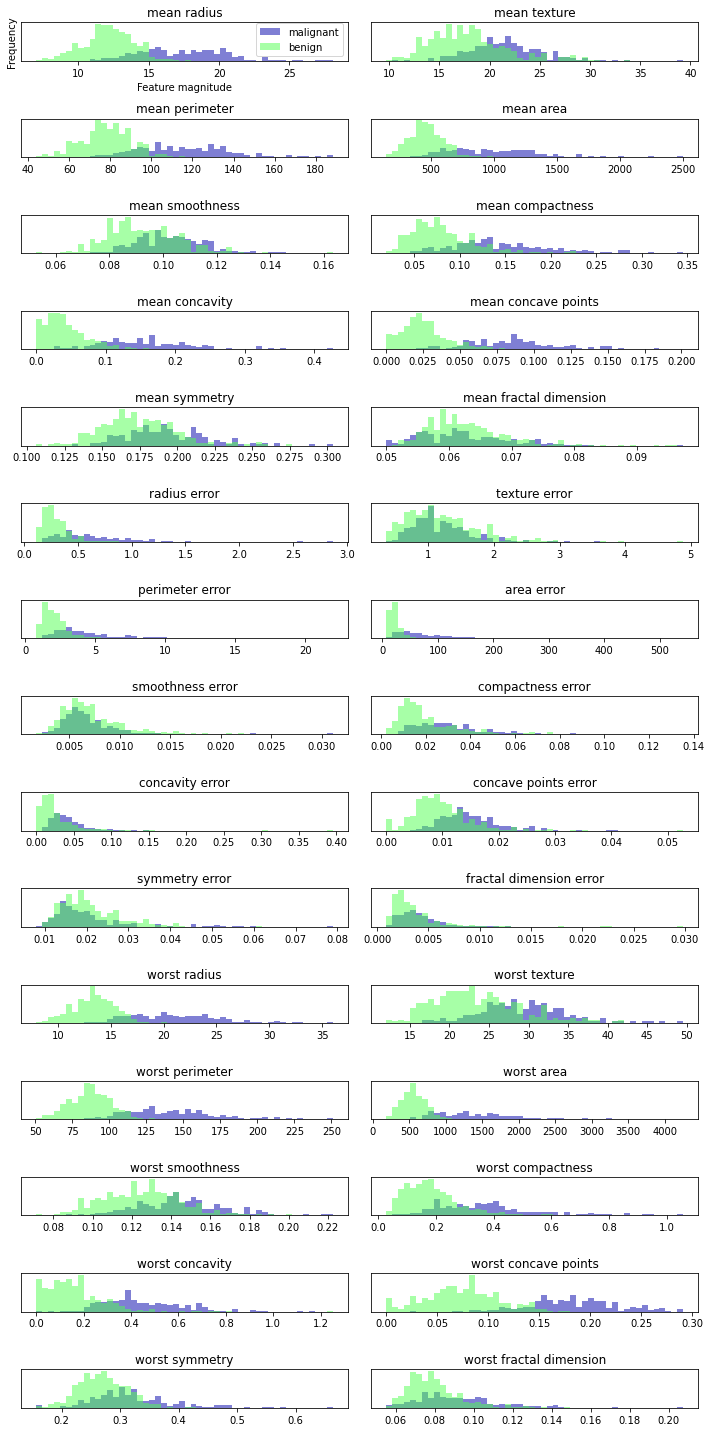

In [25]:
fig, axes = plt.subplots(15, 2, figsize=(10, 20))
malignant = cancer.data[cancer.target == 0] 
print('malignant.shape', malignant.shape )
benign = cancer.data[cancer.target == 1]
print('benign.shape', benign.shape )

ax = axes.ravel()

for i in range(30):
    _, bins = np.histogram(cancer.data[:, i], bins=50) 
    ax[i].hist(malignant[:, i], bins=bins, color=mglearn.cm3(0), alpha=.5) 
    ax[i].hist(benign[:, i], bins=bins, color=mglearn.cm3(2), alpha=.5) 
    ax[i].set_title(cancer.feature_names[i]) 
    ax[i].set_yticks(()) 
    
ax[0].set_xlabel("Feature magnitude") 
ax[0].set_ylabel("Frequency") 
ax[0].legend(["malignant", "benign"], loc="best")
fig.tight_layout()

In [26]:
scaler = StandardScaler() 
scaler.fit(cancer.data) 
X_scaled = scaler.transform(cancer.data)

In [27]:
from sklearn.decomposition import PCA

# keep the first two principal components of the data
pca = PCA(n_components = 2) 
# fit PCA model to beast cancer data 
pca.fit(X_scaled) 

# transform data onto the first two principal components 
X_pca = pca.transform(X_scaled) 
print("Original shape: {}".format(str(X_scaled.shape)))
print("Reduced shape: {}".format(str(X_pca.shape)))

Original shape: (569, 30)
Reduced shape: (569, 2)


Text(0, 0.5, 'Second principal component')

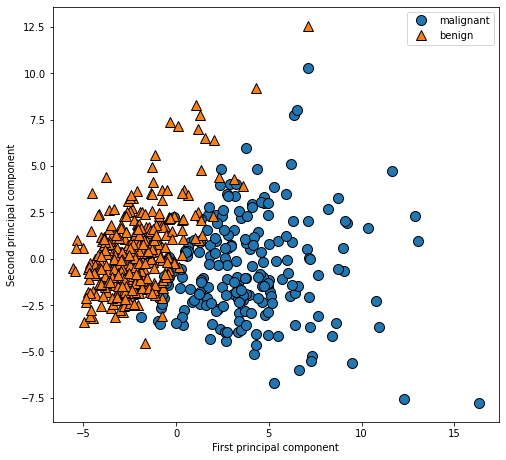

In [29]:
# plot first vs. second principal component, colored by class 
plt.figure(figsize=(8, 8)) 
mglearn.discrete_scatter(X_pca[:, 0], X_pca[:, 1], cancer.target)
plt.legend(cancer.target_names, loc="best") 
plt.gca().set_aspect("equal")
plt.xlabel("First principal component") 
plt.ylabel("Second principal component")

In [31]:
# As much components as original features
print('PCA component shape: {}'.format(pca.components_.shape))
# There are two values in componentes (per feature), the first principal component and 
# the second principal component
print('PCA component: {}'.format(pca.components_))

PCA component shape: (2, 30)
PCA component: [[ 0.21890244  0.10372458  0.22753729  0.22099499  0.14258969  0.23928535
   0.25840048  0.26085376  0.13816696  0.06436335  0.20597878  0.01742803
   0.21132592  0.20286964  0.01453145  0.17039345  0.15358979  0.1834174
   0.04249842  0.10256832  0.22799663  0.10446933  0.23663968  0.22487053
   0.12795256  0.21009588  0.22876753  0.25088597  0.12290456  0.13178394]
 [-0.23385713 -0.05970609 -0.21518136 -0.23107671  0.18611302  0.15189161
   0.06016536 -0.0347675   0.19034877  0.36657547 -0.10555215  0.08997968
  -0.08945723 -0.15229263  0.20443045  0.2327159   0.19720728  0.13032156
   0.183848    0.28009203 -0.21986638 -0.0454673  -0.19987843 -0.21935186
   0.17230435  0.14359317  0.09796411 -0.00825724  0.14188335  0.27533947]]


Text(0, 0.5, 'Principal components')

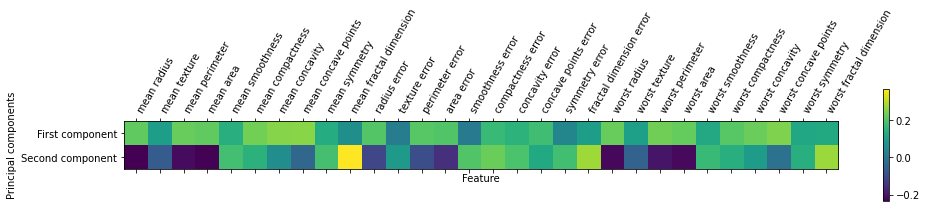

In [32]:
plt.matshow(pca.components_, cmap='viridis')
plt.yticks([0, 1], ["First component", "Second component"])
plt.colorbar() 
plt.xticks(range(len(cancer.feature_names)), cancer.feature_names, rotation=60, ha='left') 
plt.xlabel("Feature") 
plt.ylabel("Principal components")

In [33]:
print(np.linalg.norm(pca.components_[0])) 
print(np.linalg.norm(pca.components_[1]))

1.0000000000000002
1.0
